In [130]:
from matplotlib import pyplot as plt

In [131]:
datakey, datalabel, datalimit = 'data', 'Cases', 100
if False:
    datakey, datalabel, datalimit = 'deaths', 'Deaths', 10

In [132]:
categories = [
    'Feb 15', 'Feb 16', 'Feb 17', 'Feb 18', 'Feb 19', 'Feb 20', 'Feb 21',
    'Feb 22', 'Feb 23', 'Feb 24', 'Feb 25', 'Feb 26', 'Feb 27', 'Feb 28',
    'Feb 29', 'Mar 01', 'Mar 02', 'Mar 03', 'Mar 04', 'Mar 05', 'Mar 06',
    'Mar 07', 'Mar 08', 'Mar 09', 'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13',
    'Mar 14', 'Mar 15', 'Mar 16', 'Mar 17', 'Mar 18', 'Mar 19', 'Mar 20',
    'Mar 21', 'Mar 22',
]

In [133]:
south_korea_tests = 5832
tests_million = {
    'italy': 3423,
    'germany': 3859,
    'spain': 642,
    'uk': 1007,
    'france': 165,
    'usa': 166,
    'switzerland': 505,
}

tests_adjusted = {k: v/south_korea_tests for k, v in tests_million.items()}

In [134]:
countries = {
    'italy': {
        'population': 60480000,
        'data': [
            3, 3, 3, 3, 3, 4, 21,
            79, 157, 229, 323, 470, 655, 889,
            1128, 1701, 2036, 2502, 3089, 3858, 4636,
            5883, 7375, 9172, 10149, 12462, 15113, 17660,
            21157, 24747, 27980, 31506, 35713, 41035, 47021,
            53578, 59138,
        ],
        'deaths': [
            0, 0, 0, 0, 0, 0, 1,
            2, 3, 7, 11, 12, 17, 21,
            29, 41, 52, 79, 107, 148, 197,
            233, 366, 463, 631, 827, 1016, 1266,
            1441, 1809, 2158, 2503, 2978, 3405, 4032,
            4825, 5476,
        ],
    },
    'spain': {
        'population': 46660000,
        'data': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 1, 7, 11, 23, 31,
            56, 82, 118, 162, 224, 276, 387,
            485, 625, 1169, 1524, 2039, 2871, 4906,
            5678, 7177, 9070, 10265, 13050, 16139, 21510,
            25496, 28768,
        ],
        'deaths': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 2, 3, 8,
            10, 17, 30, 36, 55, 86, 133,
            196, 294, 342, 533, 638, 831, 1093,
            1381, 1772,
        ],
    },
    'germany': {
        'population': 82790000,
        'data': [
            13, 13, 9, 7, 7, 3, 2,
            2, 2, 2, 3, 11, 32, 58,
            63, 114, 149, 187, 246, 528, 652,
            782, 1022, 1204, 1545, 1938, 2714, 3621,
            4544, 5754, 7188, 9274, 12194, 15161, 19848,
            22364, 24873,
        ],
        'deaths': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 2, 2, 3, 6, 8,
            9, 13, 17, 26, 28, 44, 68,
            84, 94,
        ],
    },
    'france': {
        'population': 66990000,
        'data': [
            7, 7, 6, 4, 4, 4, 4,
            1, 1, 0, 2, 5, 25, 44,
            86, 116, 176, 196, 269, 404, 632,
            921, 1178, 1370, 1739, 2221, 2803, 3570,
            4396, 5284, 6473, 6953, 8268, 9328, 12612,
            14459, 16018,
        ],
        'deaths': [
            1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 2, 2, 2,
            2, 2, 3, 4, 4, 7, 9,
            16, 19, 30, 33, 48, 61, 79,
            91, 127, 148, 175, 264, 372, 450,
            562, 674,
        ],
    },
    'usa': {
        'population': 330000000,
        'data': [
            12, 12, 12, 12, 12, 10, 29,
            29, 28, 48, 51, 54, 54, 57,
            60, 65, 85, 106, 138, 200, 289,
            401, 504, 663, 949, 1248, 1625, 2157,
            2830, 3553, 4503, 6196, 9003, 13474, 18121,
            24207, 33546,
        ],
        'deaths': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0,
            1, 1, 6, 9, 11, 12, 15,
            19, 22, 26, 30, 38, 41, 49,
            57, 68, 86, 109, 150, 207, 256,
            302, 419,
        ],
    },
    'uk': {
        'population': 66440000,
        'data': [
            1, 1, 1, 1, 1, 1, 1,
            1, 5, 5, 5, 5, 8, 12,
            15, 28, 31, 43, 79, 97, 144,
            189, 257, 298, 359, 434, 562, 769,
            1101, 1336, 1436, 1814, 2457, 3060, 3741,
            5018, 5683,
        ],
        'deaths': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 1, 2,
            2, 3, 5, 6, 8, 10, 11,
            21, 35, 55, 71, 104, 144, 177,
            233, 281,
        ],
    },
    'switzerland': {
        'population': 8570000,
        'data': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 1, 8, 15,
            19, 23, 29, 56, 90, 116, 210,
            264, 327, 369, 491, 644, 857, 1124,
            1358, 2199, 2330, 2700, 3067, 4164, 5544,
            6863, 7474,
        ],
        'deaths': [
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 1, 1,
            1, 2, 2, 3, 4, 7, 11,
            13, 14, 19, 27, 33, 43, 56,
            80, 98,
        ],
    },
}

In [135]:
figkwargs = dict(
    figsize=(9, 9),
    dpi=80,
)
xtickskwargs = dict(
    rotation=45,
)

legendkwargs = dict(
    loc='upper left',
)

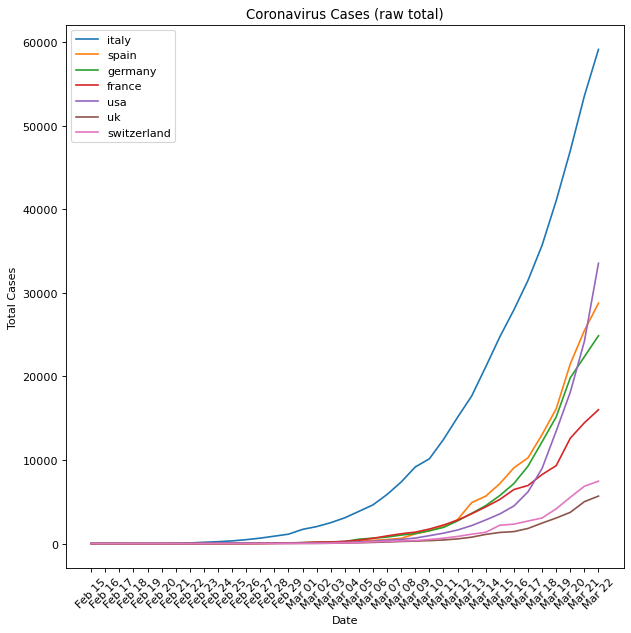

In [136]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(categories, data, label=country)


plt.title('Coronavirus {} (raw total)'.format(datalabel))
plt.ylabel('Total {}'.format(datalabel))
plt.xlabel('Date')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()


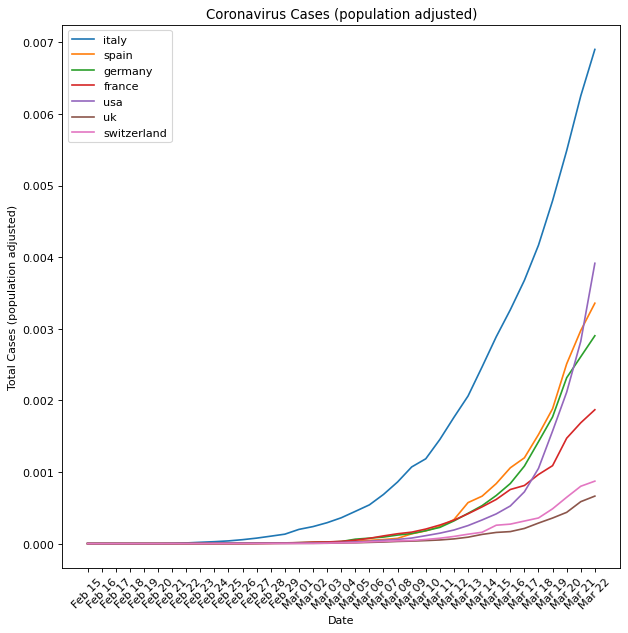

In [137]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    data = cproperties[datakey]
    data += [float('NaN')] * (len(categories) - len(data))
    data = [x/population for x in data]
    plt.plot(categories, data, label=country)

plt.title('Coronavirus {} (population adjusted)'.format(datalabel))
plt.ylabel('Total {} (population adjusted)'.format(datalabel))
plt.xlabel('Date')
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

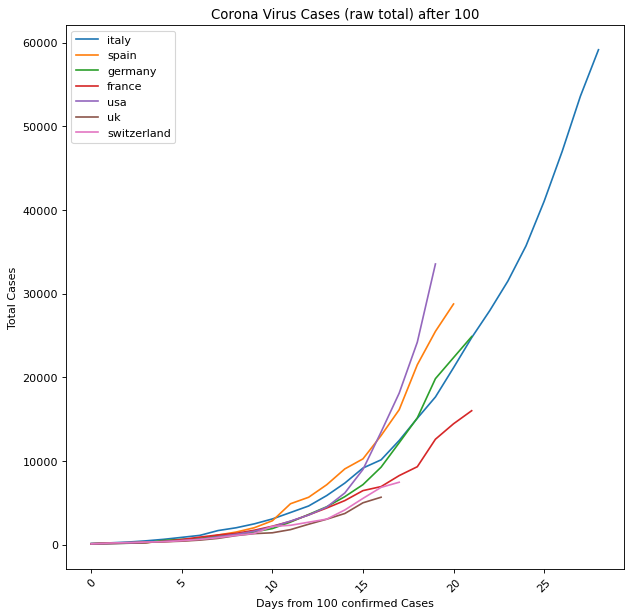

In [138]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x for x in data if x >= datalimit]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title('Corona Virus {} (raw total) after {}'.format(datalabel, datalimit))
plt.xticks(**xtickskwargs)
plt.ylabel('Total {}'.format(datalabel))
plt.xlabel('Days from {} confirmed {}'.format(datalimit, datalabel))
plt.legend(**legendkwargs)
plt.show()

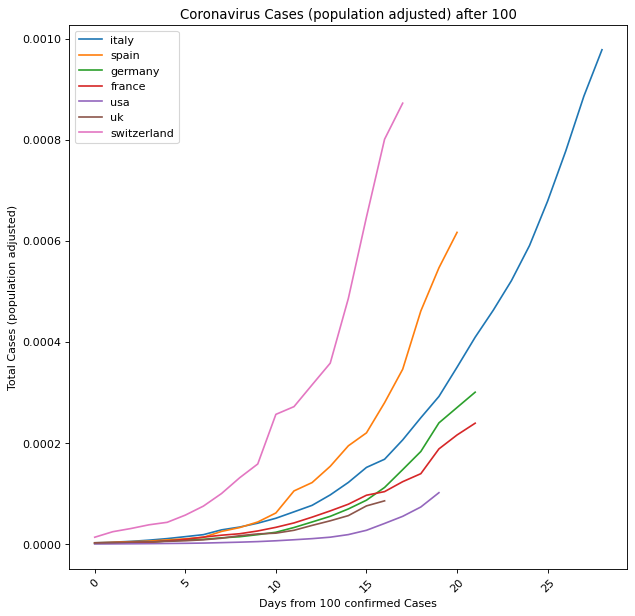

In [139]:
fig = plt.figure(**figkwargs)
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x for x in data if x >= 100]
    data += [float('NaN')] * (len(categories) - len(data))
    data = [x/population for x in data]
    plt.plot(range(len(categories)), data, label=country)


plt.title('Coronavirus {} (population adjusted) after {}'.format(datalabel, datalimit))
plt.ylabel('Total {} (population adjusted)'.format(datalabel))
plt.xlabel('Days from {} confirmed {}'.format(datalimit, datalabel))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

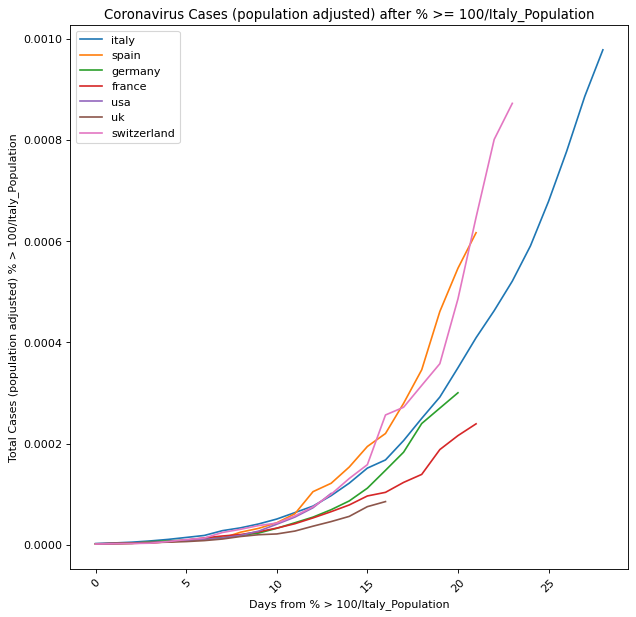

In [140]:
fig = plt.figure(**figkwargs)
explodes = 100 / countries['italy']['population']
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x/population for x in data if x/population >= explodes]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title('Coronavirus {} (population adjusted) after % >= {}/Italy_Population'.format(datalabel, datalimit))
plt.ylabel('Total {} (population adjusted) % > {}/Italy_Population'.format(datalabel, datalimit))
plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

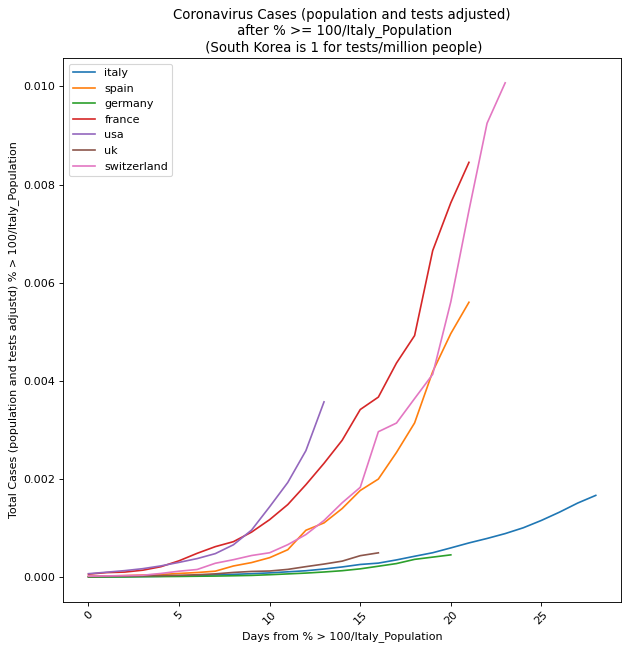

In [141]:
fig = plt.figure(**figkwargs)
explodes = 100 / countries['italy']['population']
for country, cproperties in countries.items():
    population = cproperties['population']
    try:
        testadj = tests_adjusted[country] 
    except KeyError:
        continue
    data = cproperties[datakey]
    data = [x/population for x in data if x/population >= explodes]
    data = [x/testadj for x in data]
    data += [float('NaN')] * (len(categories) - len(data))
    plt.plot(range(len(categories)), data, label=country)


plt.title(('Coronavirus {} (population and tests adjusted)\n'
           ' after % >= 100/Italy_Population\n'
           ' (South Korea is 1 for tests/million people)').format(datalabel))
plt.ylabel('Total {} (population and tests adjustd) % > {}/Italy_Population'.format(datalabel, datalimit))
plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()

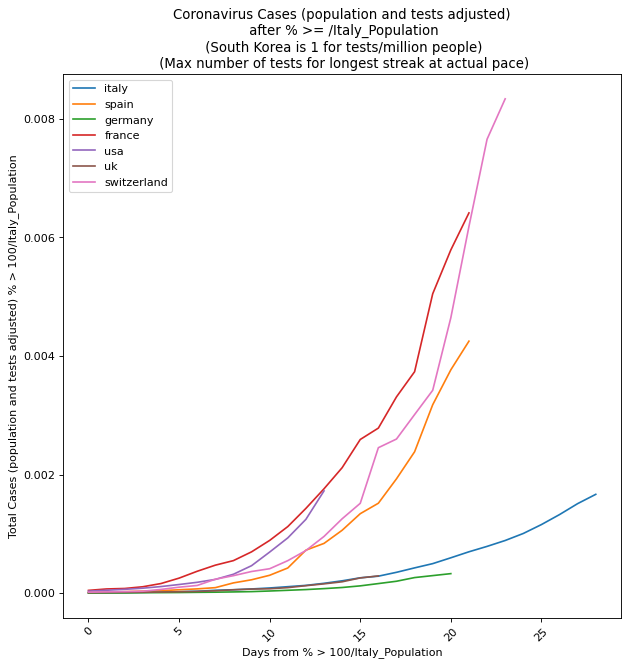

In [142]:
fig = plt.figure(**figkwargs)
explodes = 100 / countries['italy']['population']
data_store = {}
data_lens = []
for country, cproperties in countries.items():
    population = cproperties['population']
    data = cproperties[datakey]
    data = [x/population for x in data if x/population >= explodes]
    data_lens.append(len(data))
    data_store[country] = data
        
maxlen = max(data_lens)

for country, data in data_store.items():
    try:
        tests = tests_million[country] 
    except KeyError:
        continue

    # How many more tests at the actual pace to match the
    # longest virus streak (which we know is Italy)
    ldata = len(data)
    try:
        test_pace = tests / ldata
    except ZeroDivisionError:
        data = [float('NaN')] * len(categories)
    else:
        # max tests adjusted to korea max
        max_tests = maxlen * test_pace
        testadj = max_tests / south_korea_tests
        data = [x/testadj for x in data]
        data += [float('NaN')] * (len(categories) - len(data))
                                 
    plt.plot(range(len(categories)), data, label=country)


plt.title(('Coronavirus {} (population and tests adjusted)\n'
           ' after % >= /Italy_Population\n'
           ' (South Korea is 1 for tests/million people)\n'
           ' (Max number of tests for longest streak at actual pace)').format(datalabel, datalimit))
plt.ylabel('Total {} (population and tests adjusted) % > {}/Italy_Population'.format(datalabel, datalimit))
plt.xlabel('Days from % > {}/Italy_Population'.format(datalimit))
plt.xticks(**xtickskwargs)
plt.legend(**legendkwargs)
plt.show()